<a href="https://colab.research.google.com/github/Dracomp89/Tarea_1_FEST/blob/main/Tarea_1_FEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

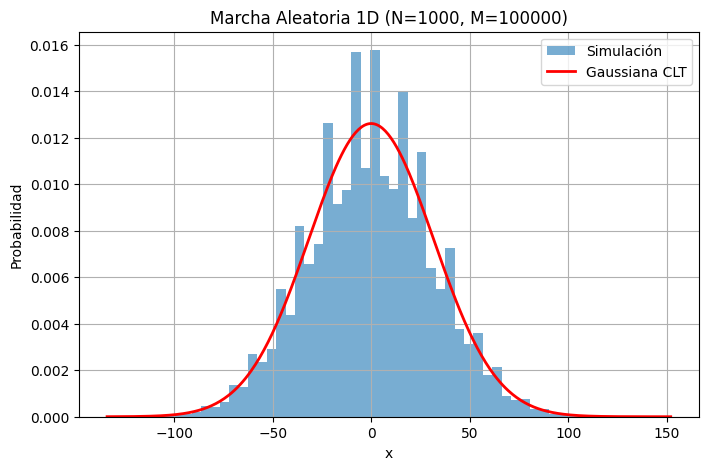

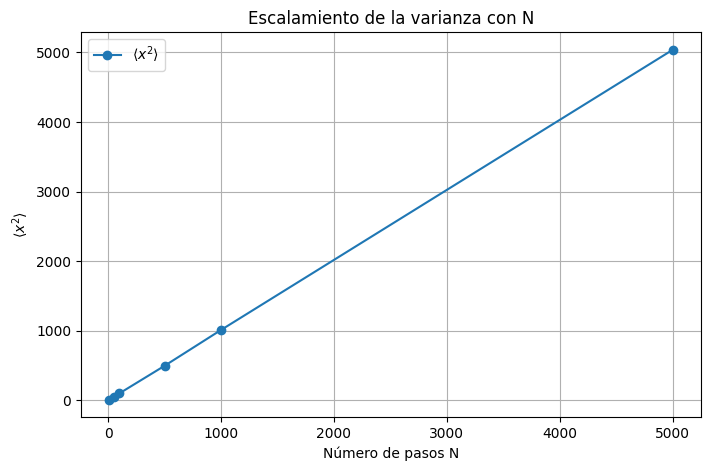

==== Resultados ====
N=   10 -> <x> ≈ 0.062, <x^2> ≈ 9.836
N=   50 -> <x> ≈ -0.011, <x^2> ≈ 48.136
N=  100 -> <x> ≈ 0.092, <x^2> ≈ 100.639
N=  500 -> <x> ≈ -0.472, <x^2> ≈ 496.841
N= 1000 -> <x> ≈ -0.528, <x^2> ≈ 1012.121
N= 5000 -> <x> ≈ 0.350, <x^2> ≈ 5038.910

Constante de difusión teórica: D = 0.500
Constante de difusión numérica (para N=5000): D ≈ 0.504


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_1d(N: int, a: float = 1.0) -> float:

    pasos = np.random.choice([-a, a], size=N)
    return np.sum(pasos)

def simulate_many(N: int, M: int, a: float = 1.0) -> np.ndarray:

    return np.array([random_walk_1d(N, a) for _ in range(M)])

def main():

    N = 1000
    M = 100000
    a = 1.0
    tau = 1.0


    posiciones = simulate_many(N, M, a)

    plt.figure(figsize=(8,5))
    plt.hist(posiciones, bins=60, density=True, alpha=0.6, label="Simulación")

    x_vals = np.linspace(min(posiciones), max(posiciones), 400)
    pdf = 1/np.sqrt(2*np.pi*a**2*N) * np.exp(-x_vals**2/(2*a**2*N))
    plt.plot(x_vals, pdf, 'r-', lw=2, label="Gaussiana CLT")

    plt.xlabel("x")
    plt.ylabel("Probabilidad")
    plt.title(f"Marcha Aleatoria 1D (N={N}, M={M})")
    plt.legend()
    plt.grid()
    plt.show()

    Ns = [10, 50, 100, 500, 1000, 5000]
    mean_xs = []
    mean_x2s = []

    for N_val in Ns:
        posiciones = simulate_many(N_val, M//20, a)
        mean_xs.append(np.mean(posiciones))
        mean_x2s.append(np.mean(posiciones**2))

    plt.figure(figsize=(8,5))
    plt.plot(Ns, mean_x2s, "o-", label=r"$\langle x^2 \rangle$")
    plt.xlabel("Número de pasos N")
    plt.ylabel(r"$\langle x^2 \rangle$")
    plt.title("Escalamiento de la varianza con N")
    plt.legend()
    plt.grid()
    plt.show()


    D_num = mean_x2s[-1] / (2 * Ns[-1] * tau)
    D_teo = a**2 / (2 * tau)

    print("==== Resultados ====")
    for N_val, mx, mx2 in zip(Ns, mean_xs, mean_x2s):
        print(f"N={N_val:5d} -> <x> ≈ {mx:.3f}, <x^2> ≈ {mx2:.3f}")

    print(f"\nConstante de difusión teórica: D = {D_teo:.3f}")
    print(f"Constante de difusión numérica (para N={Ns[-1]}): D ≈ {D_num:.3f}")

if __name__ == "__main__":
    main()
